In [1]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline

In [2]:
tf.disable_eager_execution()
warnings.filterwarnings('ignore')

In [3]:
tf.set_random_seed(1)
np.random.seed(1)

In [4]:
# Create Fake datasets using numpy module
data  = np.ones((100, 2))
# class0 x shape = (100, 2)
x0 = np.random.normal(2*data, 1)
#class0 y shape = (100,)
y0 = np.ones(100)
#class1 x shape = (100, 2)
x1 = np.random.normal(-2*data, 1)
#class1 y shape = (100,)
y1 = np.ones(100)
x = np.vstack((x0, x1))  # shape(100, 2) + noise data
y = np.hstack((y0, y1))  # shape(200)

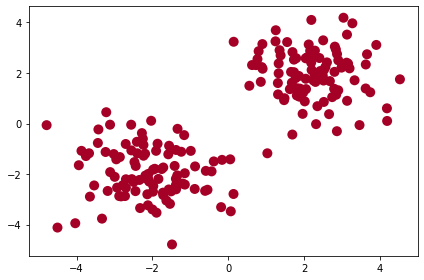

In [5]:
# Plot the datasets
plt.scatter(x[:, 0], x[:, 1], c = y, s = 100, lw = 0, cmap = 'RdYlGn')
plt.tight_layout()
plt.show()

In [6]:
# Create tensorflow variable
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

In [7]:
# Creat neural networks
hidden_layers1 = tf.layers.dense(tf_x, 10, tf.nn.relu)
output_layers = tf.layers.dense(hidden_layers1, 2)

In [8]:
# Compute cost
loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output_layers)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train_optimizers = optimizer.minimize(loss)
accuracy = tf.metrics.accuracy(labels=tf.squeeze(tf_y), predictions=tf.argmax(output_layers, axis=1), )[1]

In [9]:
sess = tf.Session()
init_optimizer = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_optimizer)

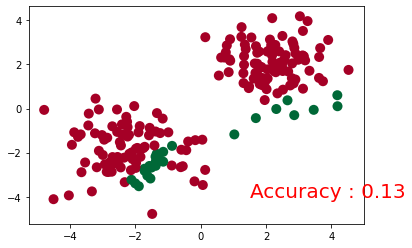

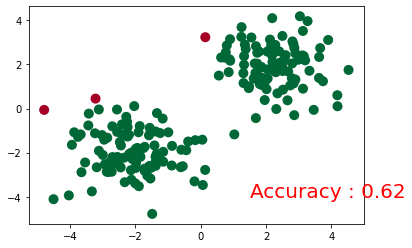

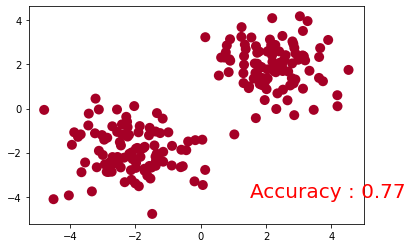

<Figure size 432x288 with 0 Axes>

In [10]:
plt.ion()
for step in range(5):
    _, acc, pred = sess.run([train_optimizers, accuracy, output_layers], {tf_x:x, tf_y:y})
    if step%2 == 0:
        plt.cla()
        plt.scatter(x[:, 0],x[:, 1], c = pred.argmax(1), s = 100, lw = 0, cmap = plt.cm.RdYlGn)
        plt.text(1.5, -4, 'Accuracy : %.2f'%acc, fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.tight_layout()
plt.show()